### MNIST Handwritten Digit Classification

In this assignment, we will build our own neural network for binary classification.

In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


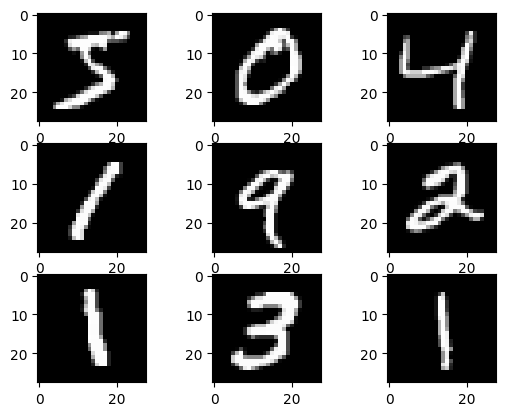

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [3]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
print("trainX shape: ",X_train.shape)
print("test shape: ",X_test.shape)

trainX shape:  (60000, 28, 28)
test shape:  (10000, 28, 28)


First, we demostrate how to use keras build a neural network for 10 digit classification

In [4]:
# Baseline MLP for MNIST dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Label Encoding
from keras.utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)


num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 10s - 33ms/step - accuracy: 0.9072 - loss: 6.6991 - val_accuracy: 0.9464 - val_loss: 2.0591
Epoch 2/10
300/300 - 7s - 23ms/step - accuracy: 0.9597 - loss: 1.1634 - val_accuracy: 0.9528 - val_loss: 1.3468
Epoch 3/10
300/300 - 5s - 18ms/step - accuracy: 0.9725 - loss: 0.5920 - val_accuracy: 0.9640 - val_loss: 0.9941
Epoch 4/10
300/300 - 5s - 16ms/step - accuracy: 0.9784 - loss: 0.4078 - val_accuracy: 0.9596 - val_loss: 0.9928
Epoch 5/10
300/300 - 4s - 13ms/step - accuracy: 0.9837 - loss: 0.2554 - val_accuracy: 0.9653 - val_loss: 0.8894
Epoch 6/10
300/300 - 4s - 14ms/step - accuracy: 0.9840 - loss: 0.2424 - val_accuracy: 0.9673 - val_loss: 0.9166
Epoch 7/10
300/300 - 5s - 15ms/step - accuracy: 0.9853 - loss: 0.2138 - val_accuracy: 0.9697 - val_loss: 0.7876
Epoch 8/10
300/300 - 4s - 13ms/step - accuracy: 0.9865 - loss: 0.2060 - val_accuracy: 0.9691 - val_loss: 0.8187
Epoch 9/10
300/300 - 3s - 12ms/step - accuracy: 0.9856 - loss: 0.1940 - val_accuracy: 0.9681 - val_loss

This time, we only keep images with 0s and 1s, build a binary classifier

In [ ]:
import numpy as np
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

train_filter = np.where((y_train == 0 ) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal'))
  model.add(Dense(10))
	# Compile model
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy score on test data: %.2f%%" % (scores[1]*100))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 - 2s - 30ms/step - accuracy: 0.9874 - loss: 0.0288 - val_accuracy: 0.9995 - val_loss: 9.5582e-04
Epoch 2/10
64/64 - 1s - 12ms/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 0.9995 - val_loss: 0.0012
Epoch 3/10
64/64 - 1s - 19ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 4/10
64/64 - 1s - 12ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 5/10
64/64 - 2s - 29ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 6/10
64/64 - 1s - 12ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 7/10
64/64 - 1s - 20ms/step - accuracy: 0.9997 - loss: 7.8205e-04 - val_accuracy: 0.9995 - val_loss: 0.0018
Epoch 8/10
64/64 - 1s - 20ms/step - accuracy: 0.9999 - loss: 5.3787e-04 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 9/10
64/64 - 1s - 13ms/step - accuracy: 0.9999 - loss: 3.6156e-04 - val_accuracy: 0.9995 - val_loss: 0.0018
Epoch

##Assignment:
Build a neural network to identify digit 0s and 1s, implements backpropagation from scratch. Then print the accuracy score on test data. Compare the results with above. The configuration of the neural network is below:
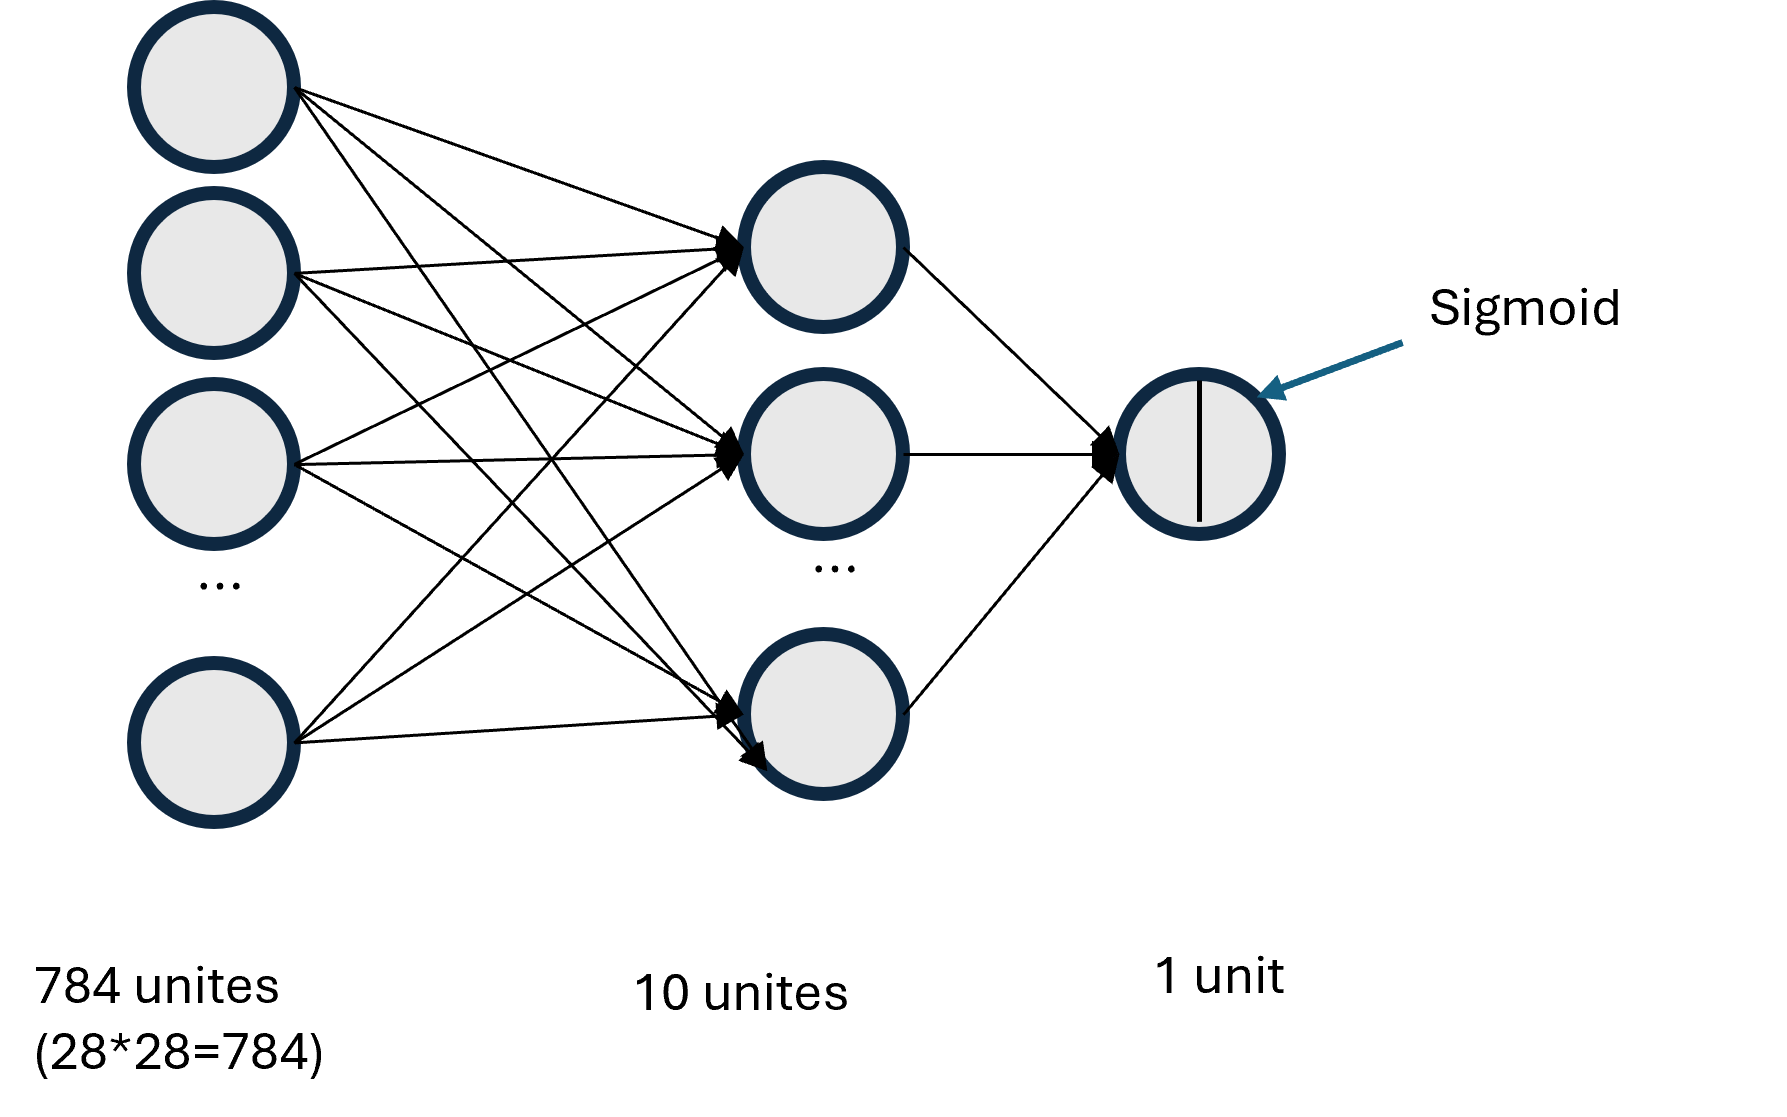

The key steps of backpropagation include:

Forward Pass: Compute the predicted output by propagating input through the neural network.

Loss Calculation: Compute the loss between the predicted output and the ground truth.

Backward Pass (Backpropagation): Compute gradients of the loss with respect to the model parameters using the chain rule.

Parameter Update: Update the model parameters using an optimization algorithm (e.g., gradient descent).

Hint: Please check this to see how backpropgration works: https://hmkcode.com/ai/backpropagation-step-by-step/